# Assignment 2 #
### Due: Friday, September 22 to be submitted via Canvas by 11:59 pm ###
### Total points: **85** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

### Note that:
###1. Only one student per group needs to submit the assignment on Canvas;
###2. Make sure to include both students' names, UT EIDs and homework group number in your submitted notebook;
###3. Please make sure your code runs, the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)
### 4. Late submissions receive 0 points.

# Group 15
1) Simran Kaur (sk57859)

2) Nikhil Nair (nn8446)

# Question 1: Bias and Variance (**10 pts**)

(a). (**4 pts**) Describe the difference between model bias and the bias of a point estimator.

(b) (**6 pts**). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine is underfitting?

- a) While the definition of bias for both the model and the point estimator is the difference between the predicted and actual value, they imply different things. Model bias concerns the accuracy of predictive models in capturing data relationships, resulting from factors like underfitting or model simplicity, causing consistent errors in predictions. On the other hand, the bias of a point estimator focuses on the accuracy of statistical estimators in estimating population parameters from sample data, quantifying systematic errors in estimation; an estimator is unbiased if, on average, it provides parameter estimates equal to the true value. 

  Both concepts deal with systematic deviations from true values but apply in distinct areas of data analysis and modeling, with model bias addressing predictive modeling and point estimator bias pertaining to statistical parameter estimation.

- b) A learning curve is the form of a training error curve, typically used to see if the model is overfitting or underfitting. For a given sample size, overfitting is when the model becomes more adept at fitting to the training dataset, but the validation error is noticeably higher than the training error, so we can say it reflects the model's inability to generalize the relationship in the data. Assessing an underfit model is a more nuanced task, however, it will typically show a high error for both the validation and the training dataset, since the model is too basic to properly capture the underlying patterns in both datasets.

  Interpretting Learning curve for Overfitting:
  Initially, with a small dataset, the model performs well on training data but struggles on validation due to memorization. As the sample size increases, both training and validation errors decrease as the model captures patterns and reduces sensitivity to noise. When sufficient sample size reaches, we observe error reduction plateau, indicating learning saturation. Overfitting emerges when increasing data results in a declining training error but rising or stable validation error, signaling that the model fits training data too closely.

  Interpretting Learning curve for Underfitting:
  Initially, limited data results in high errors for both training and validation as the model struggles to grasp underlying patterns. As the sample size grows, errors decrease, closing the gap between training and validation. However, if further sample size increases fail to significantly reduce high or slowly decreasing errors, it suggests underfitting, indicating that the model's complexity may be insufficient to capture data patterns, even with additional data.

# Question 2: Bias-Variance Exploration (**20 points**)
Consider a function $g$ such that $g(x)=2sin(\pi
x)cos(3\pi x^2)$. We will try to fit this function using a simple (binning based) piecewise constant function with varying number of bins. Here the number of bins controls the model complexity.

Note: problem below uses the statistics notation: target is y and your estimates are $y_{hat}$.


a) (2 points) Generate a dataset $(D = X,Y)$ by generating a set of 1-dimensional x's and y's in the following way -
*  $x_i = \frac{i}{2000}$ for each $i$ in $1, 2, 3 \ldots 2000$.
* Then, for each of the $x_i$'s obtain $y_i = 2sin(\pi x_i)cos(3\pi x_i^2)+ N(0,1)$ where $N(0,1)$ denotes the normal distribution with mean 0 and variance 1.

Create 10 such datasets by independently repeating the entire process 10 times. Plot any one of the generated datasets.

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def generate_data(num_points):
  x = np.arange(1, num_points + 1) / num_points
  ### START CODE ###
  y = 2 * np.sin(np.pi * x) * np.cos(3 * np.pi * x**2) + np.random.normal(0, 1, num_points)
  ### END CODE ###
  return x,y

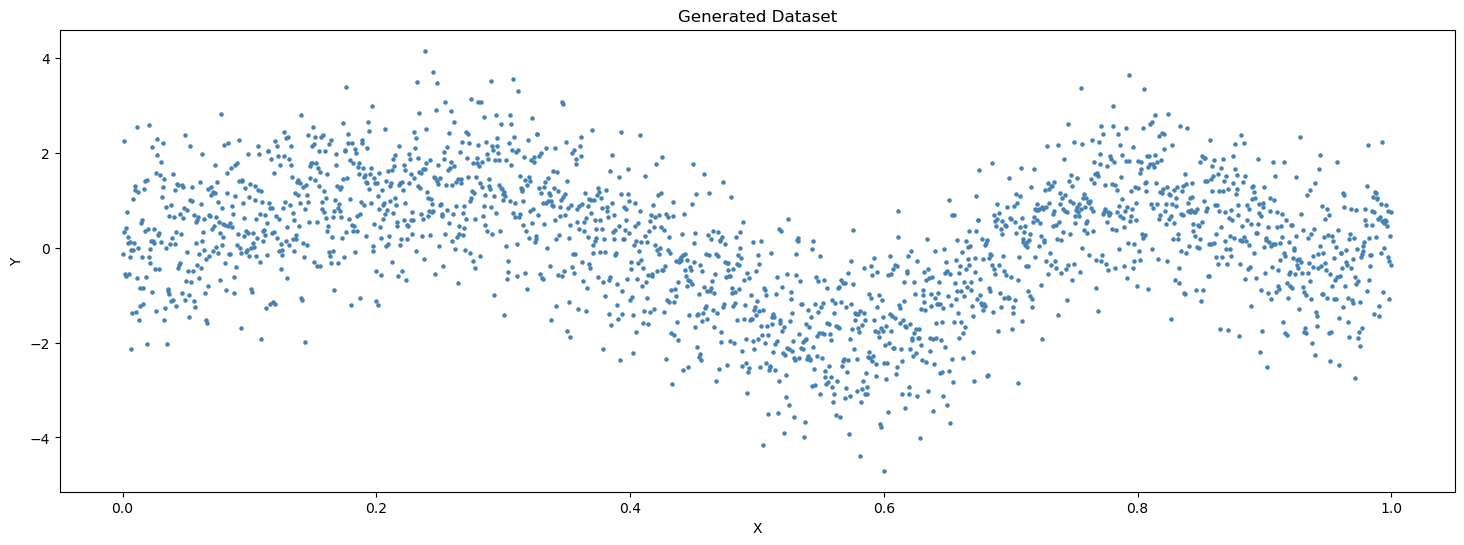

In [11]:
datasets = {}
for j in range(10):
  datasets[j] = {}
  datasets[j]['X'], datasets[j]['Y'] = generate_data(2000)

### START CODE ###
plt.figure(figsize=(18, 6))
plt.scatter(datasets[0]['X'], datasets[0]['Y'], s=5, label='Generated Data', color='steelblue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Dataset')
plt.show()
### END CODE ###


b) (5 points) Consider an estimator of function $g$, $f(x)$ that divides the x's into $K$ bins such that there are $m = n/K$ data points in each bin and the predicted y for all points in that bin is the mean of all the $y$'s in the bin.
$$
f(x) = \sum_{j=1}^{K} \bar{y}_j \mathbb{1}(x \in \text{bin } j)
$$
where
$$
\bar{y}_j = \frac{1}{m}\sum_{i=j*m}^{(j+1)*m-1} y_i.
$$
Implement this estimator. Obtain $Y_{hat} = f(x)$ for one of the datasets created above by using $K=25$ and plot the predicted $Y_{hat}$ along with $X$ and $Y$.



In [12]:
### START CODE ###
# Implement Estimator
def estimator(x, y, K):
    # Divide x into K bins
    N = len(x)
    bins = N // K

    # Compute the mean of y in each bin
    means = np.zeros(K)
    for j in range(K):
        start = j * bins
        if j == K - 1:
            # last bin may contain more points due to rounding
            end = N
        else:
            end = (j+1) * bins
        means[j] = np.mean(y[start:end])

    # Estimate y_hat for each x
    y_hat = np.zeros(N)
    for i in range(N):
        bin_number = i // bins
        y_hat[i] = means[bin_number]

    return y_hat
### END CODE ###

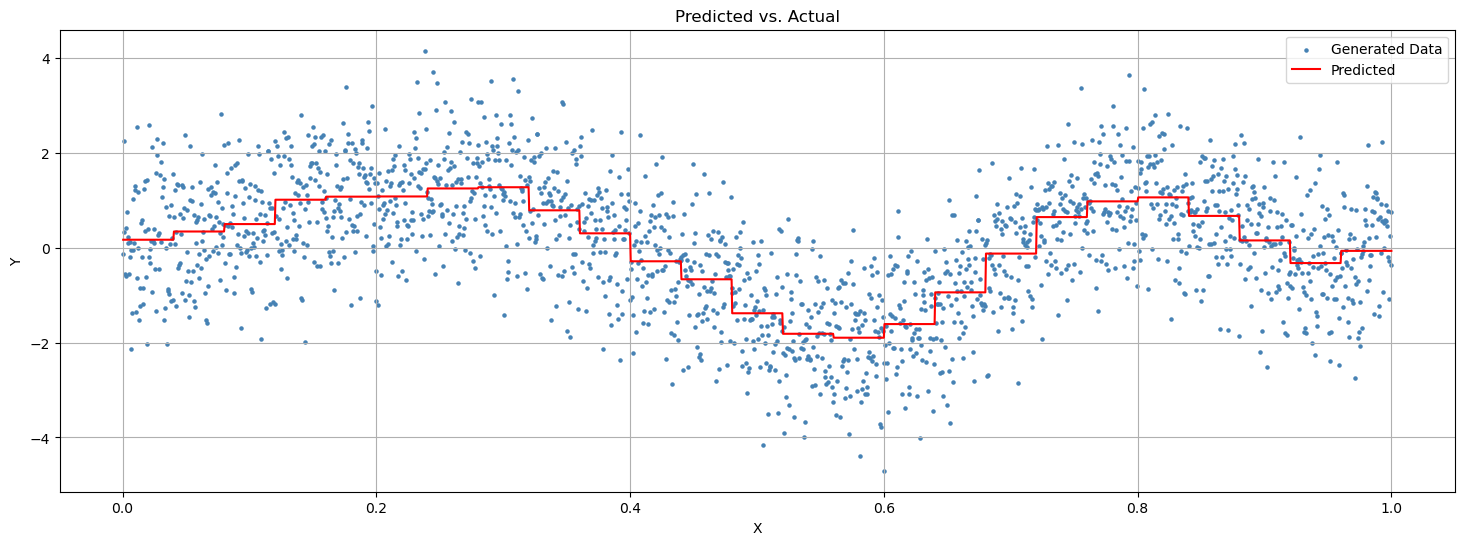

In [13]:
### START CODE ###
# Plot predicted y_{hat} along with X and Y
# Choose one dataset
dataset_id = 0

# Choose number of bins
K = 25

# Get x and y for the chosen dataset
x = datasets[dataset_id]['X']
y = datasets[dataset_id]['Y']

# Apply the estimator
y_hat = estimator(x, y, K)

# Plot the predicted y_hat along with X and Y
plt.figure(figsize=(18, 6))
plt.scatter(x, y, s=5, label='Generated Data', color='steelblue')
plt.plot(x, y_hat, label='Predicted', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Predicted vs. Actual')
plt.legend()
plt.grid(True)
plt.show()
### END CODE ###

c) (3 points) What do you think will happen to the MSE, the bias and the variance as the number of bins $K$ is increased?




> As the K increases the number of bins increase as well, to the point where if K = N = 2000 then each Yhat is the same as the point's value, leading to an overfit. This causes the MSE to go to zero, the bias to decrease and the variance to increase.




d) (5 points) For each dataset, vary the number of bins $K \in \{2,5,10,25,50,100,250, 500, 1000\}$ and obtain the predictions. Also, for any one of the datasets (your choice), compute and plot the MSE obtained with varying $K$.

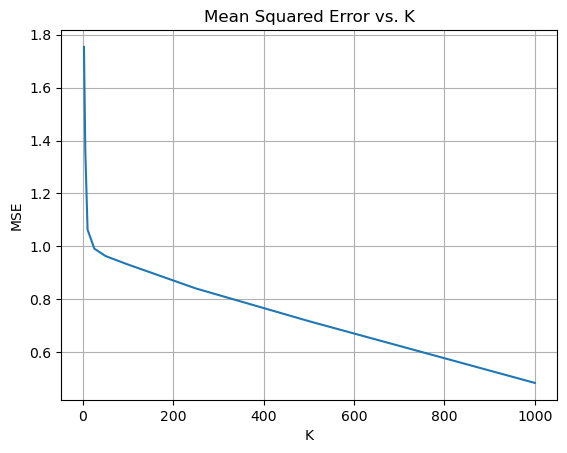

In [16]:
mse_scores = []
K = [2,5,10,25,50,100,250,500,1000]
for n in K:
  ### START CODE ###
  # Get x and y for the chosen dataset
  x = datasets[dataset_id]['X']
  y = datasets[dataset_id]['Y']
  
  # Apply the estimator
  y_hat = estimator(x, y, n)
  ### END CODE ###

  ### START CODE ###
  # Compute MSE
  mse = mean_squared_error(y, y_hat)
  ### END CODE ###
  mse_scores.append(mse)

plt.plot(K, mse_scores)
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('Mean Squared Error vs. K')
plt.grid(True)
plt.show()

e) (5 points) Recall the definitions of the bias and variance, and now given the predictions obtained from 10 different datasets, compute the (sample) bias and variance of the model for each of the $K \in \{2,5,10,25,50,100,250,500,1000\}$ and plot $K$  bias-squared vs $K$ and variance vs. $K$  on the same plot.
We are using the term "sample" to remember that bias/variance are "expected quantities" that we are approximating by considering only 10 models, one per dataset.

If y_pred denotes the 2000 x 10 2-D matrix of estimates for 2000 data points and obtained by the function estimated from the 10 datasets, use the following code to obtain the sample bias and variance.

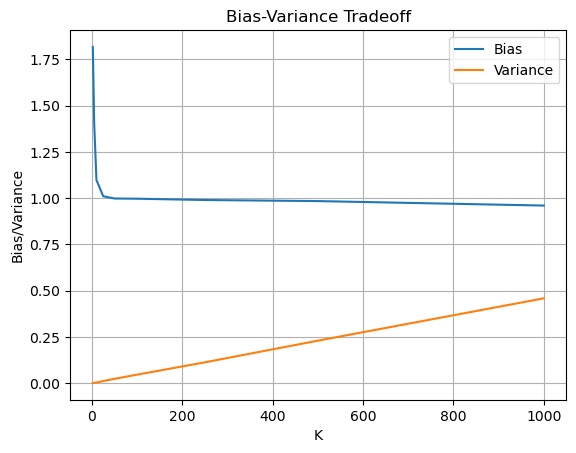

In [18]:
bias_vals = []
var_vals = []
K = [2,5,10,25,50,100,250,500,1000]
pred_y = np.zeros((len(datasets[0]['Y']),10)) # axis 0: number of data points, axis 1: number of datasets (10)

for n in K:
  for j in datasets.keys():
    x = datasets[j]['X']
    y = datasets[j]['Y']
    ### START CODE ###
    # Estimate y_{hat}
    y_hat = estimator(x, y, n)
    ### END CODE ###
    pred_y[:,j] = y_hat

  ### START CODE ###
  # Compute the mean of the estimates over 10 datasets for each input x_{i}
  avg_yhat = np.mean(pred_y, axis=1)
  
  # Compute the MSE between avg_yhat and y as bias
  bias = np.mean((avg_yhat - y)**2)
  
  # Compute the variance of the estimates over 10 datasets for each input x_{i}, then average over all inputs
  var_yhat = np.mean((pred_y - avg_yhat[:,np.newaxis])**2)
  ### END CODE ###
  bias_vals.append(bias)
  var_vals.append(var_yhat)

plt.plot(K, bias_vals, label='Bias')
plt.plot(K, var_vals, label='Variance')

plt.xlabel('K')
plt.ylabel('Bias/Variance')
plt.title('Bias-Variance Tradeoff')

plt.legend()  # Add legend based on labels in the plot

plt.grid(True)  # Add grid lines

plt.show()

# Question 3: Stochastic Gradient Descent Improvements (**10 pts**)

## Part 1. (**5 pts**) ##
Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function.


In the standard gradient descent, whenever we optimize a cost function, the algorithm updates the model parameters based on the current gradient. It can lead to large vertical oscillations or slow convergence, especially when the cost function has elongated, curved, or  has uneven contours. Introducing the momentum in the process solves this problem by introducing the concept of "memory" into the updates. It is like adding a bit of inertia to the optimization process that helps to achieve a faster convergence of the loss function by addressing some of the challenges faced by standard gradient descent algorithms.

It makes the use of Exponentially Weighted Averages of past gradient to update the weights instead of directly using the current gradient. This moving average smooths out the vertical variations close to zero because of the average of both positive and negative directions, whereas the major move is towards the horizontal direction because the average of all horizontal values is towards the same side. This enables our algorithm to take a straighter forward path and end up at local optima with fewer iterations. 

Since the vertical movements are less, therefore it enables us to use a higher learning rate without the risk of divergence. And with a higher learning rate, the algorithm can take larger steps towards the optima, thus making the process faster. We can determine how much weight to give to the past weights using the beta (momentum), which typically ranges from 0.8 to 0.999, the default being 0.9.

In summary, the momentum in gradient descent helps to smooth out the gradient variation, helps the algorithm to move more directly towards the optima, which allows for higher learning rates, and ultimately speeds up the convergence of the loss function.

## Part 2. (**5 pts**) ##
Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent.


The benefit of using Mini-batch Stochastic Gradient Descent is that it covers the disadvantages of both Mini-batch Gradient Descent and Stochastic Gradient Descent effectively. The key advantages are:

1) It improves the efficiency and Speed by striking a balance between Mini-batch Gradient Descent and SGD. It processes a small, randomly selected subset (mini-batch) of the data in each iteration which is faster to converge than pure SGD because it benefits from the averaging effect of mini-batches, and reduces the variance in updates compared to SGD. When compared to Mini-batch Gradient Descent, Mini-batch SGD is generally more computationally efficient because it processes smaller mini-batches, allowing for faster updates.

2) Mini-batch SGD, like pure SGD, benefits from the noise introduced by mini-batches, which can help escape local minima. 

3) Mini-batch SGD typically produces a smoother loss curve than pure SGD due to the averaging effect of mini-batches. This smoother curve can facilitate monitoring and early stopping. Mini-batch Gradient Descent may have a smoother curve compared to pure SGD but may not be as smooth as Mini-batch SGD.

4) Because of the taking the average in a small batch, the variations in the data gets reduced, thus allowing faster convergence.

5) Mini-batch SGD also introduces certain noise due to the random selection of mini-batches, similar to SGD. This noise acts as a form of regularization, potentially preventing overfitting, whereas, the Mini-batch Gradient Descent may not introduce as much noise, potentially making it less effective as a regularizer.

# Question 4: Stochastic Gradient Descent (30 pts)

## Part 1. (**10 pts**) Stochastic gradient descent derivation ##

Use stochastic gradient descent to derive the coefficent updates (assuming squared loss is being used as the cost function) for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$




In [9]:
from IPython.display import Image

# Replace 'file_path' with the actual path to your image file
image_url = r'AML HW2 Q4 PART 1.jpg'

#Incase if the image is unclear, we are also attaching the link to the image file on Drive in the markdown below

# Display the image
Image(url=image_url)


Attaching link to the image file on Drive as well:
https://drive.google.com/file/d/1Y8hrYp3fttOD-k4YXnpij-RPlWnpExHo/view?usp=sharing

## Part 2. (**20 pts**) Stochastic gradient descent coding ##

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values).

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) .

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [2]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving SGD_samples (1).csv to SGD_samples (1).csv


### Part A

In [26]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:

    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)

    def sgd(self, gradient):
        # Update the self.coef using SGD
        ### START CODE ###
        self.coef = self.coef - (self.learning_rate  * gradient)
        ### END CODE ###

    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                ### START CODE ###
                y_pred = self.linearPredict(X[i]) 
                err = y[i] - y_pred
                ### END CODE ###

                # Compute gradients
                ### START CODE ###
                gradient = -1* err * X[i] + self.regularization * self.coef
                ### END CODE ###

                # Update weights
                ### START CODE ###
                self.sgd(gradient)
                ### END CODE ###

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = np.exp(-X[:,0])
        x[:,2] = X[:,0]
        x[:,3] = X[:,0]*X[:,1]

        return x

    def linearPredict(self, X):
        # Compute the dot product of self.coef and X
        ### START CODE ###
        return np.dot(X,self.coef)
        ### END CODE ###

In [29]:
data = pd.read_csv('SGD_samples (1).csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [30]:
# Iterate through all combinations of learning rates and regularization strength
# Use your Regression class to fit the data and record MSEs
### START CODE ###
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

mse_df = pd.DataFrame(columns = ['learning_rate','lambda_reg','mse']) 

for n in learning_rate:
    for lambda_reg in regularization:
        reg_model = Regression(learning_rate=n, regularization=lambda_reg, n_epoch=n_epochs)

        reg_model.fit(X, y, update_rule='sgd', plot=False)

        mse = reg_model.lowest_mse
        mse_df.loc[len(mse_df)] = [n,lambda_reg,mse]

mse_df
### END CODE ###

,learning_rate,lambda_reg,mse
0,0.0001,0.0,0.036821
1,0.0001,10.0,0.056126
2,0.0001,100.0,0.063636
3,0.0010,0.0,0.030496
4,0.0010,10.0,0.056034
5,0.0010,100.0,0.063492
6,0.0100,0.0,0.027391
7,0.0100,10.0,0.054626
8,0.0100,100.0,0.063437
9,0.1000,0.0,0.030988


### Part B

The best 2 combinations are:
   learning_rate  lambda_reg       mse
6          0.010         0.0  0.027391
3          0.001         0.0  0.030496


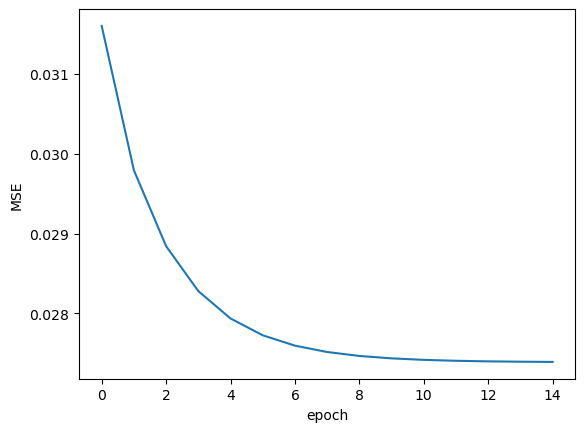

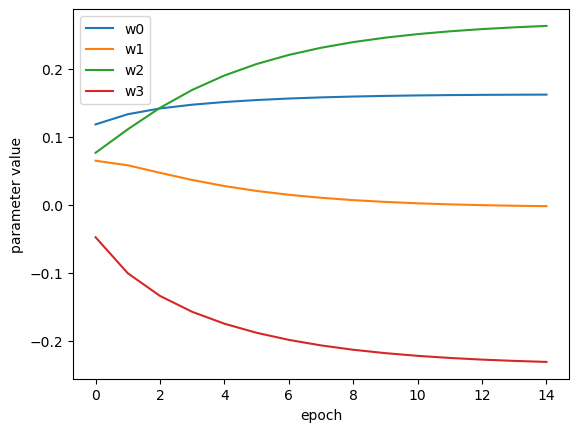

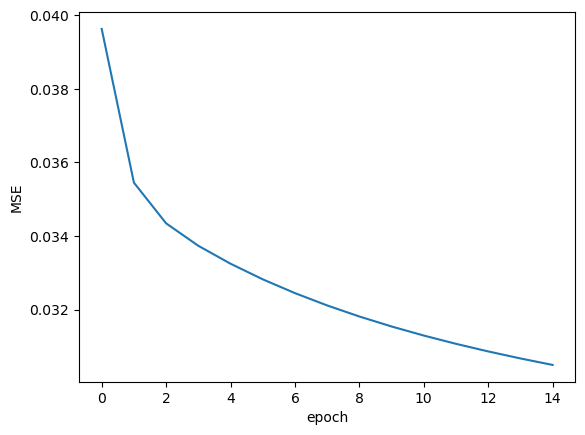

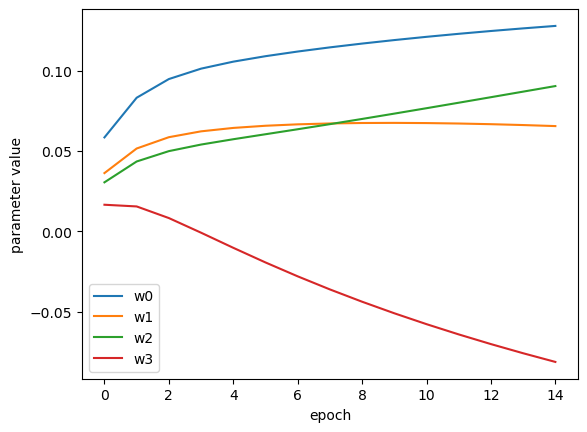

In [6]:
# For the best two combinations, use the plot option in Regression.fit() to plot MSE and parameters as a function of epoch (15 epochs)
### START CODE ###
best_comb =mse_df.sort_values(by='mse')[:2]

print('The best 2 combinations are:')
print(best_comb)

for i in range(2):
    best_model =Regression(best_comb['learning_rate'].iloc[i],best_comb['lambda_reg'].iloc[i],n_epochs)
    mse_ridge=best_model.fit(X, y,plot=True)
### END CODE ###

# Question 5: Visualizing Gradient Descent (**15 pts**) #

## Part 1. **(10 pts)** Coding ##

In this exercise, you are going to visualize four batch update steps of gradient descent for a  linear regression model with two parameters (i.e. weights, indicated by $\theta$).

The true target function is $t = \theta_{0} + \theta_{1}x$ with $\theta_{0}=2$ and $\theta_{1}=0.5$.

Try the following two initializations:
* $\theta_{0}=0$ and $\theta_{1}=0$
* $\theta_{0}=0$ and $\theta_{1}=-4$

and try the following three learning rates:
* 0.5
* 1
* 2.1

Therefore, there will be **six** combinations or settings to consider in total. For each setting, you will plot (a) the data and the changing linear regression fit and (b) the model parameters moving in the weight space after every update.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Generate data
np.random.seed(42)
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x + np.random.normal(0, 0.2, size=x.shape)

In [21]:
def loss_func(theta0, theta1):
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y - model(x, theta0, theta1))**2, axis=2)/2

def model(x, theta0, theta1):
    return theta0 + theta1 * x

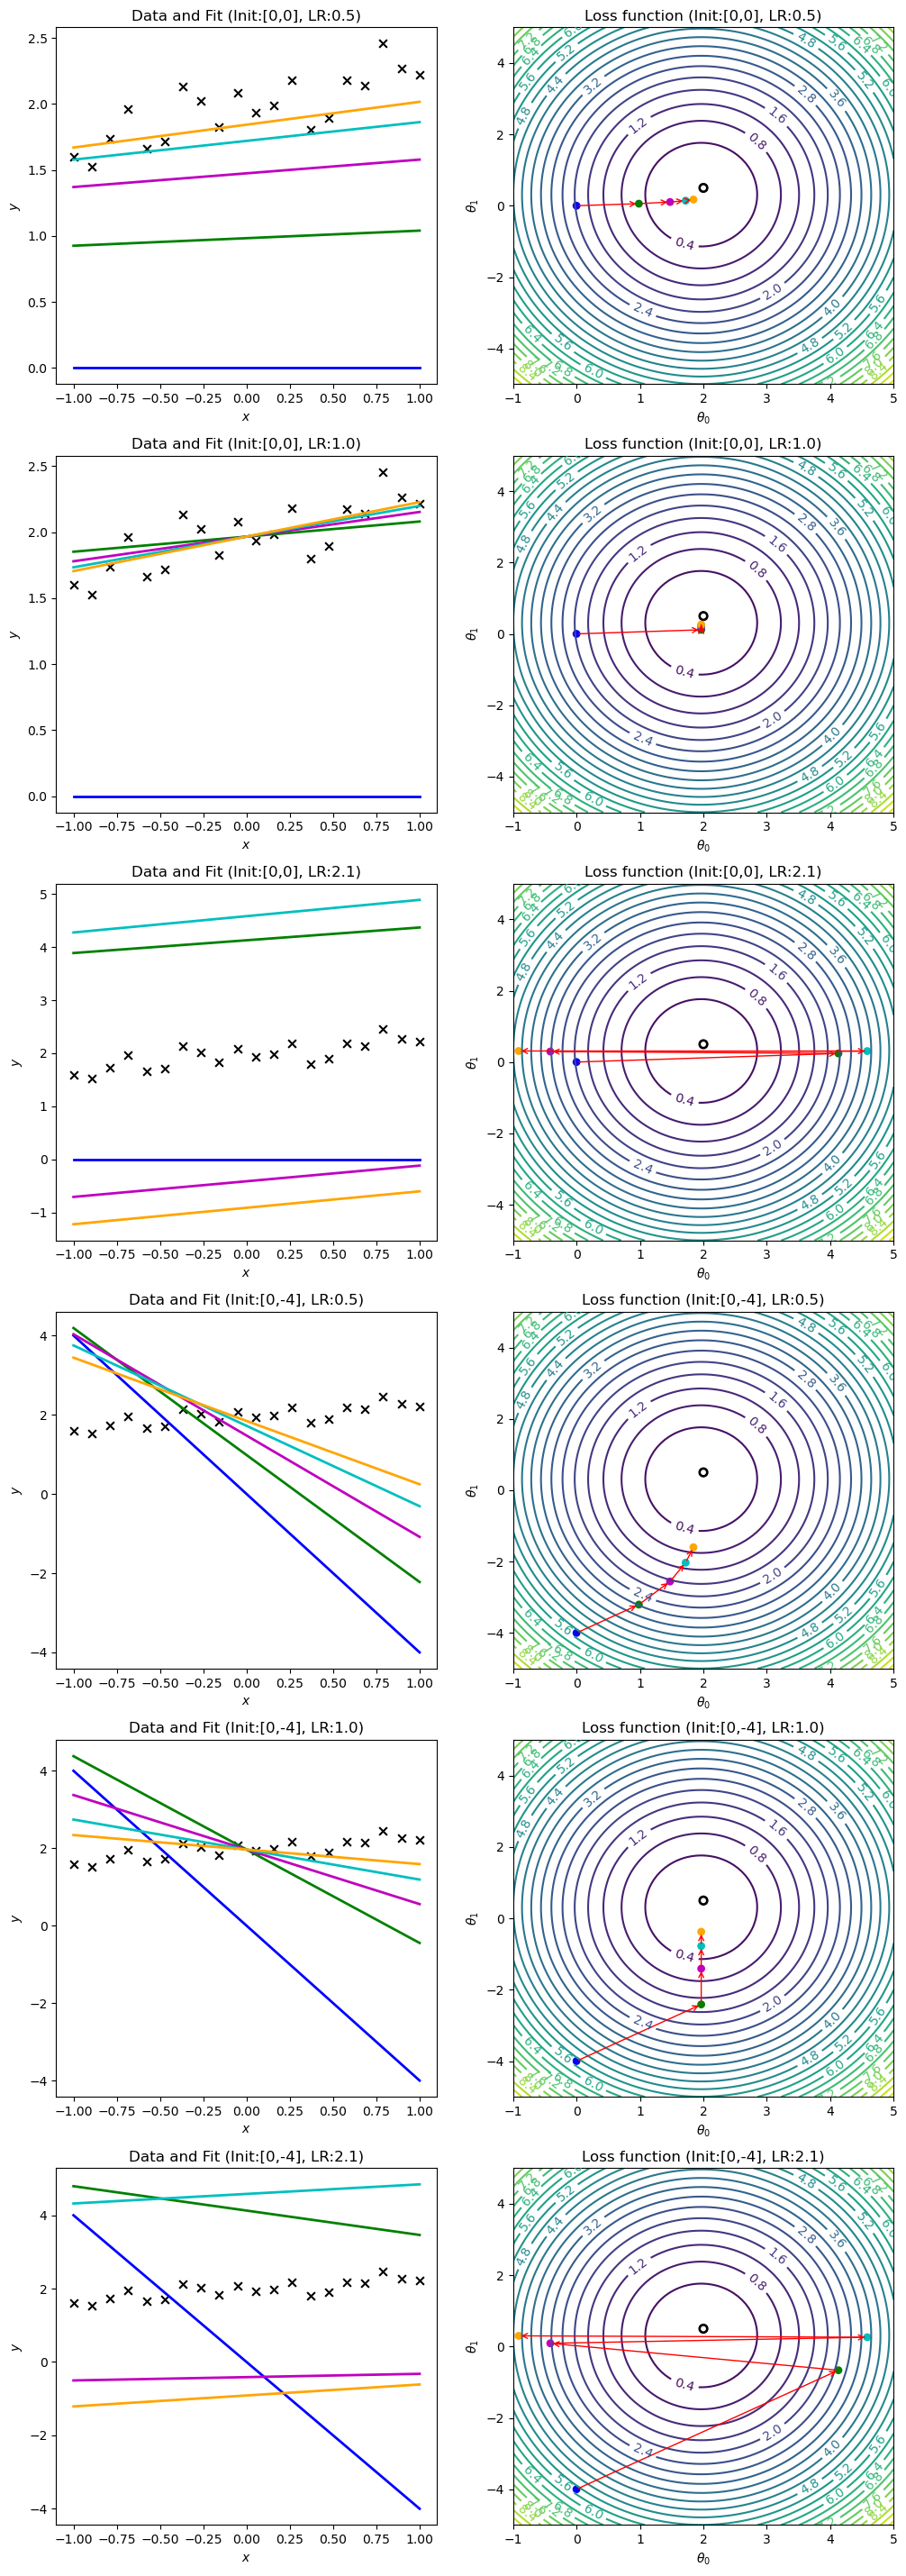

In [23]:
# Experiment with different initialization and learning rate combinations
### START CODE ###
init_list = [(0, 0), (0, -4)]
lr_list = [0.5, 1.0, 2.1]
### END CODE ###

# Left column shows the data and the changing linear regression models
# Right column shows the model parameters moving over the loss landscape
fig, ax = plt.subplots(nrows=len(init_list) * len(lr_list), ncols=2, figsize=(12, 36))

for i, init in enumerate(init_list):
    for j, lr in enumerate(lr_list):
        row_idx = i * len(lr_list) + j
        ax[row_idx][0].scatter(x, y, marker='x', s=40, color='k')
        theta0_grid = np.linspace(-1,5,101)
        theta1_grid = np.linspace(-5,5,101)
        L_grid = loss_func(theta0_grid[np.newaxis,:,np.newaxis],
                           theta1_grid[:,np.newaxis,np.newaxis])

        # A labeled contour plot for the right column
        X, Y = np.meshgrid(theta0_grid, theta1_grid)
        contours = ax[row_idx][1].contour(X, Y, L_grid, 30)
        ax[row_idx][1].clabel(contours)
        # The target parameter values indicated on the loss function contour plot
        ax[row_idx][1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

        # Take N = 4 steps with learning rate alpha down the steepest gradient, starting at init
        N = 4
        theta = [init] # placeholder list for storing historical parameters
        L = [loss_func(*theta[0])[0]] # placeholder list for storing historical loss values
        for _ in range(N):
            last_theta = theta[-1]
            this_theta = np.empty((2,))
            # Update theta
            ### START CODE ### (2 lines of code)
            this_theta[0] = last_theta[0] - lr * np.sum((model(x, *last_theta) - y)) / m
            this_theta[1] = last_theta[1] - lr * np.sum((model(x, *last_theta) - y) * x) / m
            ### END CODE ###
            theta.append(this_theta)
            L.append(loss_func(*this_theta))

        # Annotate the loss function plot with coloured points indicating the
        # parameters chosen and red arrows indicating the steps down the gradient.
        # Also plot the fit function on the LHS data plot in a matching colour.
        colors = ['b', 'g', 'm', 'c', 'orange']
        ax[row_idx][0].plot(x, model(x, *theta[0]), color=colors[0], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
        for k in range(1,N+1):
            ax[row_idx][1].annotate('', xy=theta[k], xytext=theta[k-1],
                           arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                           va='center', ha='center')
            ax[row_idx][0].plot(x, model(x, *theta[k]), color=colors[k], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[k]))
        ax[row_idx][1].scatter(*zip(*theta), c=colors, s=40, lw=0)

        # Labels and titles.
        ax[row_idx][1].set_xlabel(r'$\theta_0$')
        ax[row_idx][1].set_ylabel(r'$\theta_1$')
        ax[row_idx][1].set_title(f'Loss function (Init:[{init[0]},{init[1]}], LR:{lr})')
        ax[row_idx][0].set_xlabel(r'$x$')
        ax[row_idx][0].set_ylabel(r'$y$')
        ax[row_idx][0].set_title(f'Data and Fit (Init:[{init[0]},{init[1]}], LR:{lr})')
        axbox = ax[row_idx][0].get_position()

plt.show()

## Part 2. **(5 pts)** ##
For the experiment above, briefly summarize what you observed about the impact of (i) initialization and (ii) learning rate, on the evolution of the model parameters.

The significance of initialization becomes evident when we observe the starting positions in our example, which can be either (0, 0) or (0, -4). The choice of initialization points in gradient descent plays a pivotal role in the optimization process, determining the initial trajectory toward convergence. Initializing the parameters at (0, 0) sets the starting point at the origin, resulting in slower convergence due to the initial parameters being distant from the optimal values. This necessitates smaller steps to approach the global minimum. Conversely, initializing at (0, -4) places the starting point in a different location, facilitating quicker convergence as the algorithm rapidly adjusts the parameters.

The learning rate is another critical factor influencing gradient descent optimization. It dictates the step size taken during each update. In our experiments, a learning rate of 1 was considered moderate and consistently led to efficient convergence. This balanced learning rate allowed the algorithm to find optimal parameters relatively quickly. In contrast, a smaller learning rate of 0.5 led to slower convergence as cautious updates were made. Conversely, a learning rate of 2.1, deemed too large, resulted in divergence and overshooting due to excessively large steps. Therefore, selecting an appropriate learning rate is crucial, striking a balance between efficient progress and stability during optimization.